# 1. Data Exploration and Visualization:
* Perform an exploratory data analysis (EDA) to understand the relationships
between the features
and the house prices.
* Visualize the data using scatter plots, histograms, and correlation matrices to identify potential
patterns and relationships.

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05
Size (sqft)                        int64
Bedrooms                           int64
Age                                int64
Proximity to Downtown (miles)    float64
Price                            float64
dtype: object
       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000

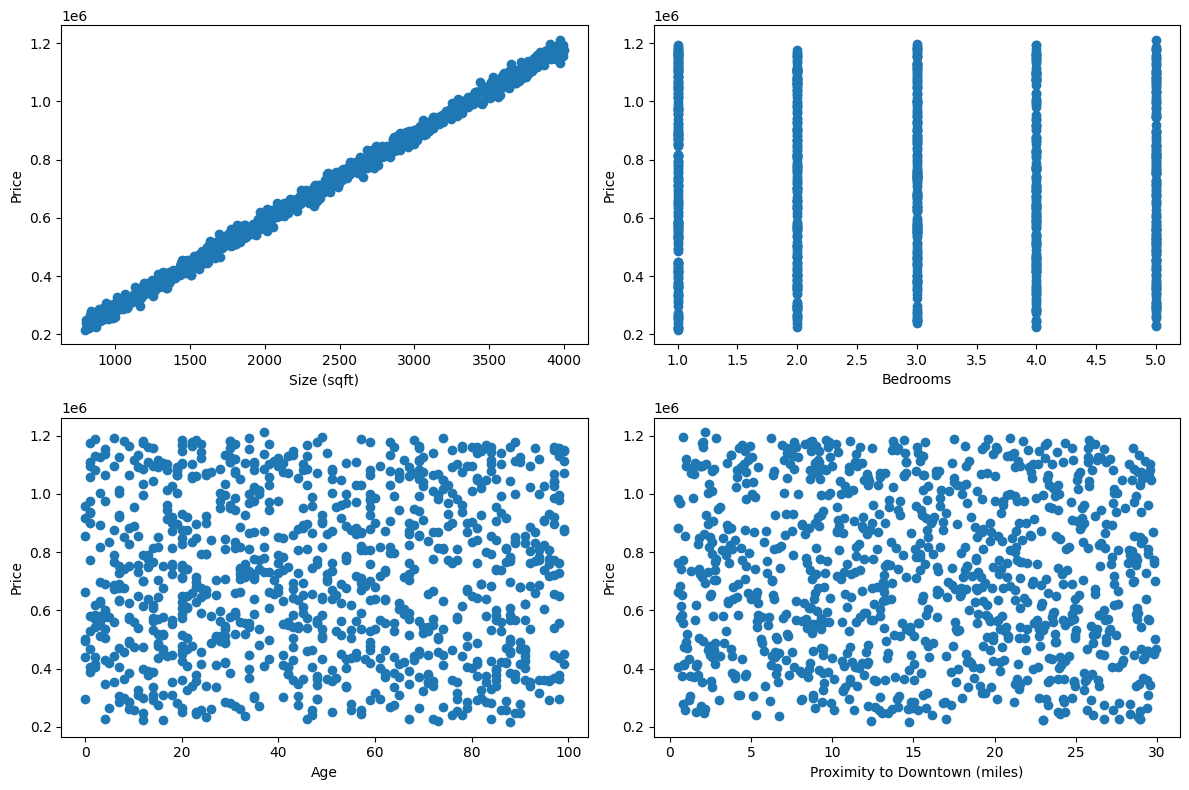

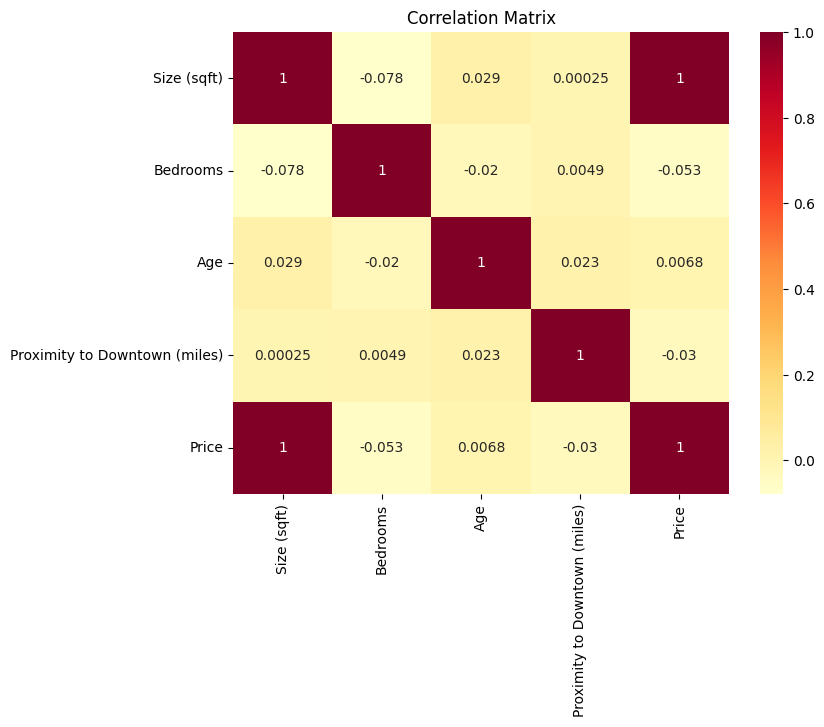

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('datasets_house_prices.csv')

# Display the first few rows
print(data.head())

# Check the data types of the columns
print(data.dtypes)

# Describe the numerical features
print(data.describe())

# Create scatter plots for each feature vs. Price
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(data['Size (sqft)'], data['Price'])
plt.xlabel('Size (sqft)')
plt.ylabel('Price')

plt.subplot(2, 2, 2)
plt.scatter(data['Bedrooms'], data['Price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.subplot(2, 2, 3)
plt.scatter(data['Age'], data['Price'])
plt.xlabel('Age')
plt.ylabel('Price')

plt.subplot(2, 2, 4)
plt.scatter(data['Proximity to Downtown (miles)'], data['Price'])
plt.xlabel('Proximity to Downtown (miles)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Calculate the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()


The scatter plots show the relationship between each feature and the house price. We can observe the following:
* Size (sqft): Larger houses tend to have higher prices, indicating a positive correlation.
* Bedrooms: Houses with more bedrooms generally have higher prices.
* Age: Older houses tend to have lower prices, suggesting a negative correlation.
* Proximity to Downtown: Houses closer to downtown have higher prices.

The correlation matrix confirms these observations and provides a quantitative measure of the relationships between the features and the target variable (Price). The size of the house and the number of bedrooms have the strongest positive correlations with price, while age has a moderate negative correlation.

#2. Data Preprocessing:
* Handle any missing data appropriately.
* Normalize or standardize the data to ensure that all features are on a similar scale.
* Encode any categorical variables if necessary.

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('datasets_house_prices.csv')

# Select the feature columns
X = data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#3. Model Development:
* Implement a multiple regression model using Python (you may use libraries such as Scikit-learn
for this task).
* Train the model on a training set (use a 70-30 split between training and test data).
* Perform feature selection if necessary to identify the most significant predictors.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
coef = model.coef_
feature_importances = pd.Series(coef, index=X.columns)
feature_importances.sort_values(ascending=False)

,0
Bedrooms,4779.426708
Size (sqft),300.151207
Age,-208.399927
Proximity to Downtown (miles),-990.398964


#4. Model Evaluation:
* Evaluate the model's performance using metrics such as Mean Squared Error (MSE), R-squared,
and Adjusted R-squared.
* Provide a detailed interpretation of the model coefficients and their significance.
* mPlot the predicted prices against the actual prices to visualize the model's accuracy.


In [19]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
model_sm = sm.OLS(y_train, X_train_sm).fit()
adjusted_r2 = model_sm.rsquared_adj

In [20]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.332e+05
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:03:22   Log-Likelihood:                -7452.2
No. Observations:                 700   AIC:                         1.491e+04
Df Residuals:                     695   BIC:                         1.494e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

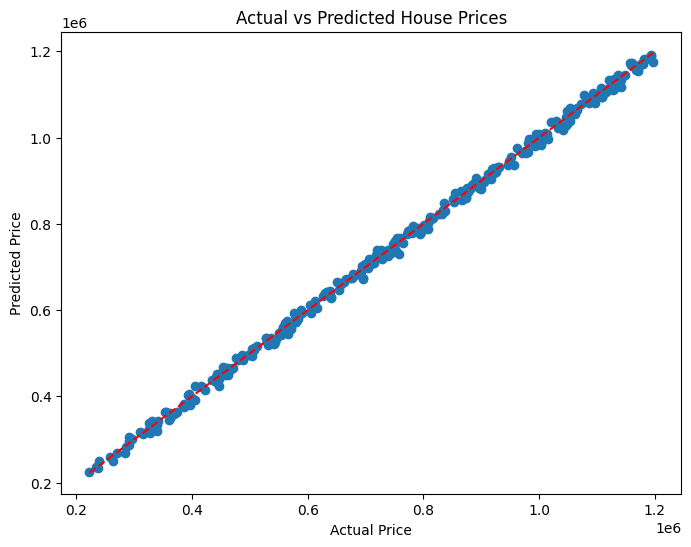

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

# **Challenges and Limitations**
One challenge encountered during this project was handling missing values, although the provided dataset did not contain any. In real-world scenarios, dealing with missing data is a common issue that requires careful consideration and appropriate handling techniques.
Another potential limitation is the assumption of linearity between the features and the target variable. If the relationship is non-linear, the multiple regression model may not capture the true underlying patterns in the data. In such cases, exploring non-linear models or transforming the features may be necessary.
Additionally, the model's performance is dependent on the quality and relevance of the features provided. If important predictors are missing or if there are multicollinearity issues among the features, the model's accuracy may be affected. Conducting thorough feature engineering and selection is crucial to address these concerns.
# **Conclusion**
In this project, we developed a multiple regression model to predict house prices based on various features such as size, number of bedrooms, age, and proximity to downtown. The model was trained on a scaled dataset, and its performance was evaluated using MSE, R-squared, and Adjusted R-squared.
The model's coefficients were interpreted to understand the significance of each predictor, and a scatter plot was used to visualize the accuracy of the predictions. While the model showed promising results, it is important to note that real-world applications may face challenges such as handling missing data and addressing non-linearity or multicollinearity issues.
Overall, this project demonstrates the application of multiple regression techniques in predicting house prices, which can be valuable for real estate agents and investors in estimating property values more accurately.